Business questions and concerns to answer with EDA: 

Are there any problems with the data? 
    Are there Null values? 
    Are there outliers? 
    Is the data sufficient? Sufficient for what kind of analysis?

Is the chemical composition of red and white wines comparable?

Does the chemical composition have any impact on the perceived quality of the wine? 
What are your observations? 


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 22})
import seaborn as sns
%matplotlib inline

# Datasets

In [2]:
red_wine = pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-red.csv', sep=';')
white_wine =  pd.read_csv('/Users/tanchaud/CAB_Berlin/Project_2/Sprint_1/winequality-white.csv', sep= ';')


# Data Wrangling #

In [3]:
# Data Enriching #
# we are creating a new column called "quality_label", we define a range and associate that range with a label
red_wine['quality_label'] = red_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
red_wine['quality_label'] = pd.Categorical(red_wine['quality_label'],
categories=['low', 'medium', 'high'])

red_wine['wine_type'] = 'red'

# we are creating a new column called "quality_label", we define a range and associate that range with a label
white_wine['quality_label'] = white_wine['quality'].apply(lambda value: 'low'
if value <= 5 else 'medium'
if value <= 7 else 'high')

# here we are transforming these labels into categrical data type (specific to pandas) instead of simple string
white_wine['quality_label'] = pd.Categorical(white_wine['quality_label'],
categories=['low', 'medium', 'high'])

white_wine['wine_type'] = 'white'

# Data Cleaning # 
red_wine = red_wine.drop_duplicates()
white_wine = white_wine.drop_duplicates()

# # # Data Structuring # 
# wines = pd.concat([red_wine, white_wine])
# wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
# wines = wines.drop(['quality'],axis=1)


# Exploratory Data Analysis 

### Univariate Analysis

In [4]:
# Data Structuring # 
wines = pd.concat([red_wine, white_wine])
wines = wines.sample(frac=1, random_state=42).reset_index(drop=True)
wines = wines.drop(['quality'],axis=1)
wines.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,wine_type
0,5.3,0.32,0.12,6.6,0.043,22.0,141.0,0.99370,3.36,0.60,10.4,medium,white
1,6.4,0.30,0.27,4.4,0.055,17.0,135.0,0.99250,3.23,0.44,12.2,medium,white
2,6.5,0.22,0.32,2.2,0.028,36.0,92.0,0.99076,3.27,0.59,11.9,medium,white


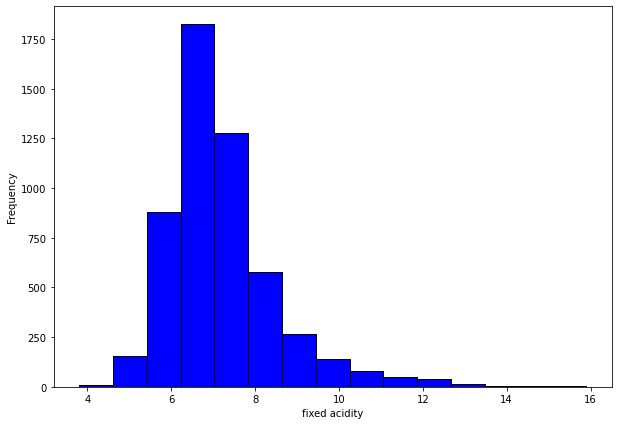

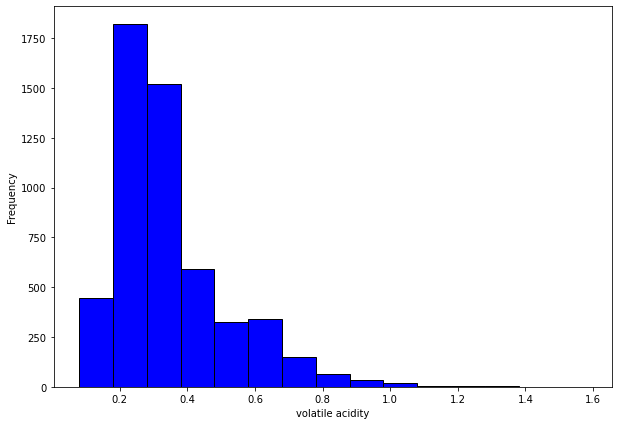

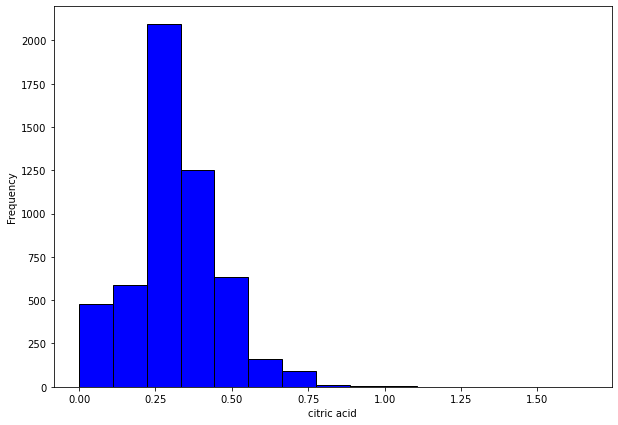

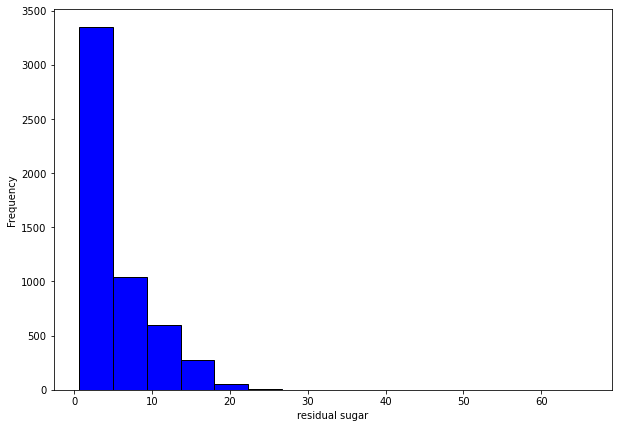

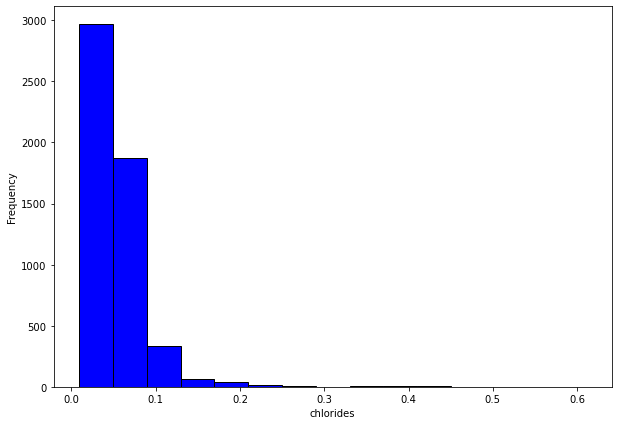

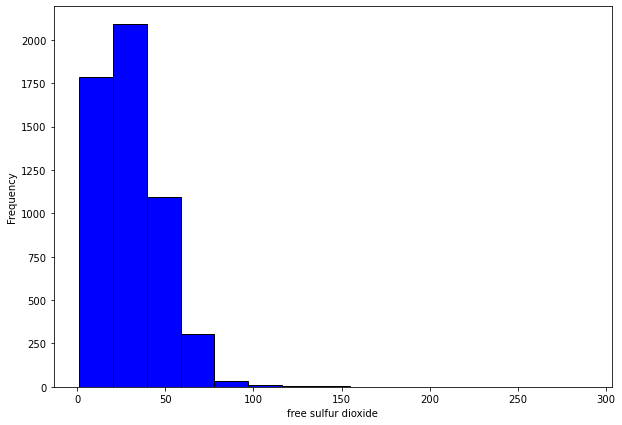

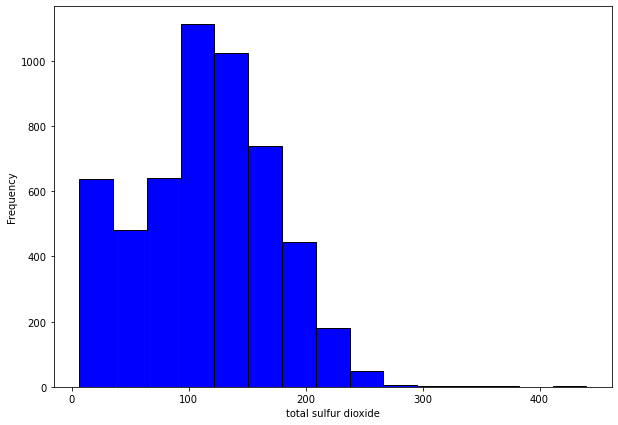

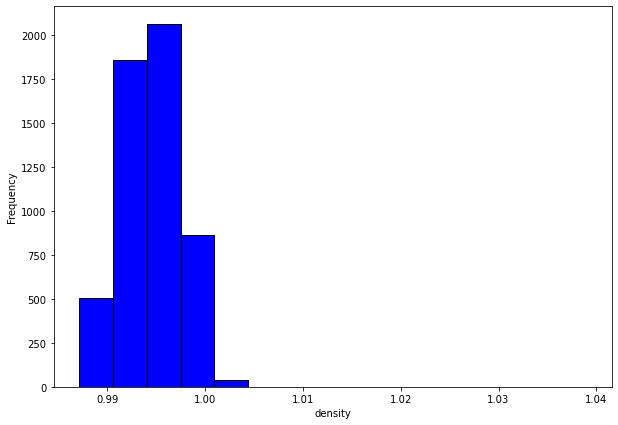

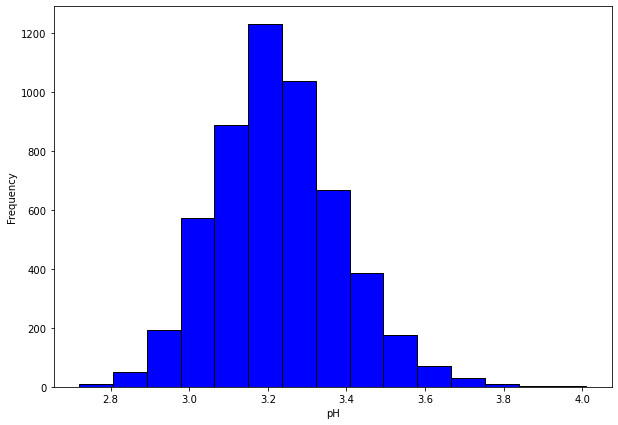

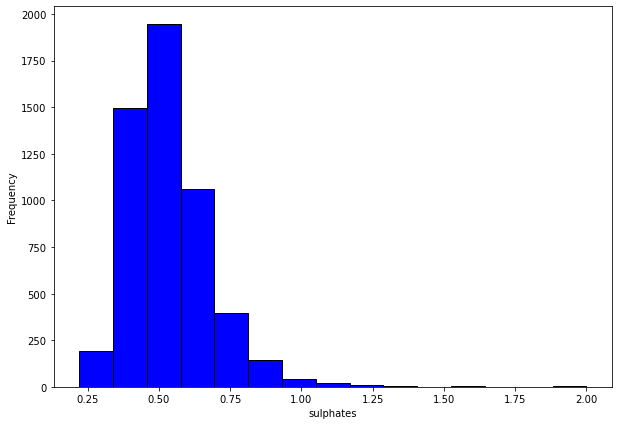

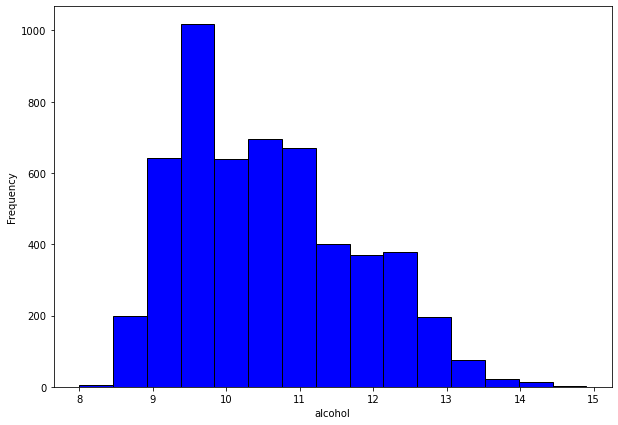

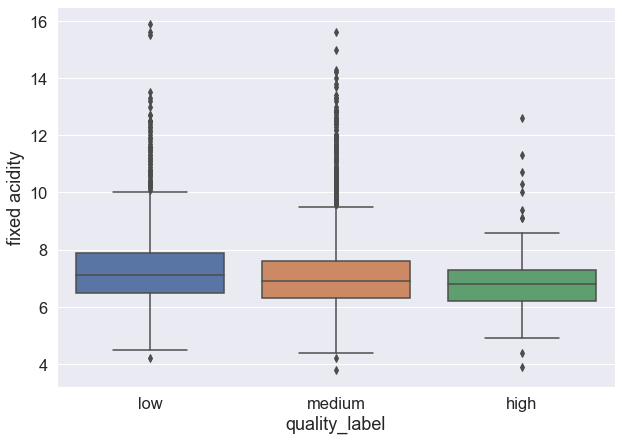

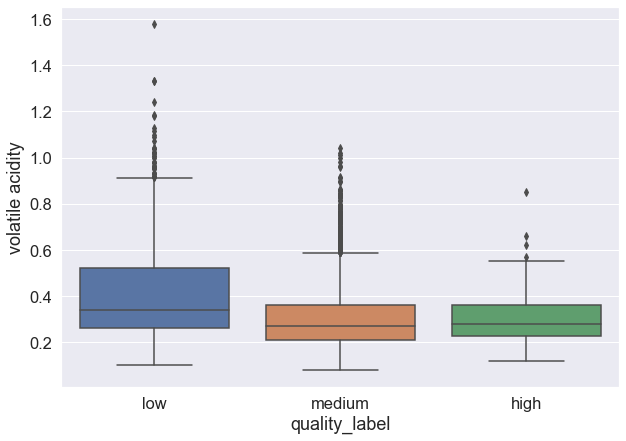

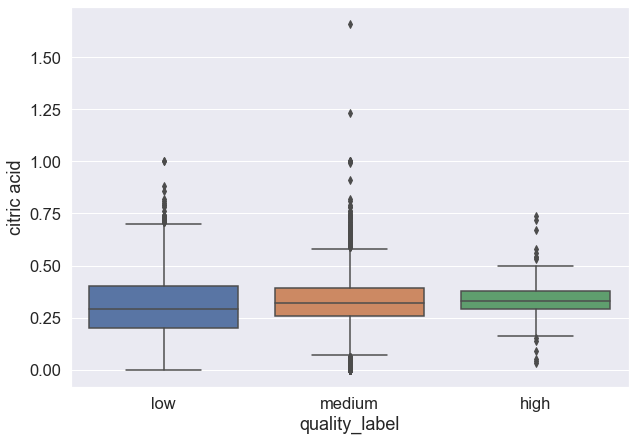

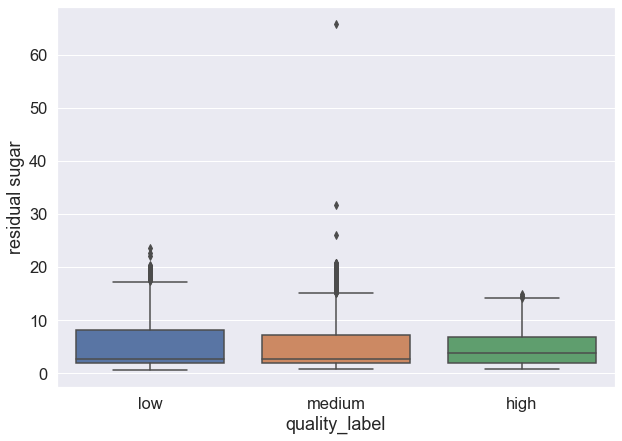

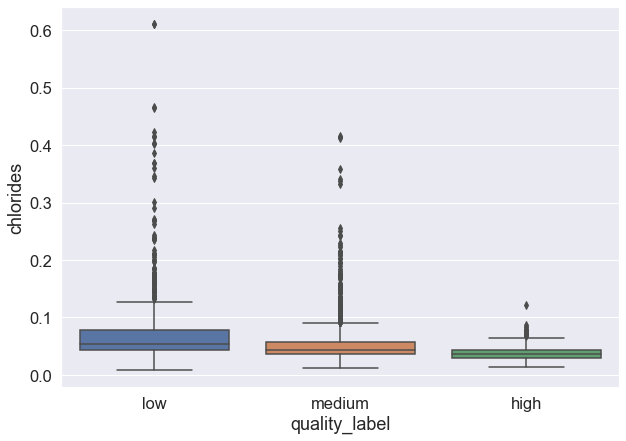

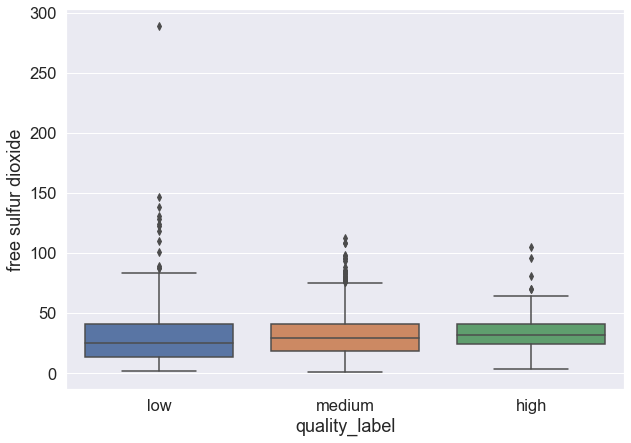

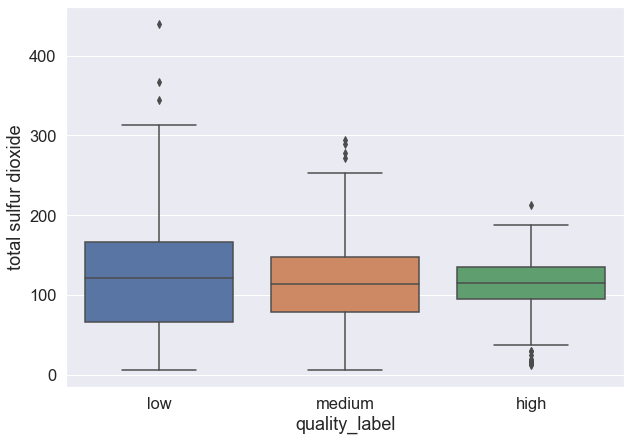

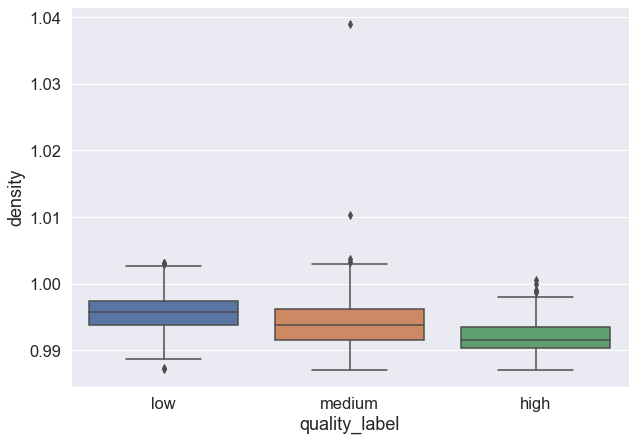

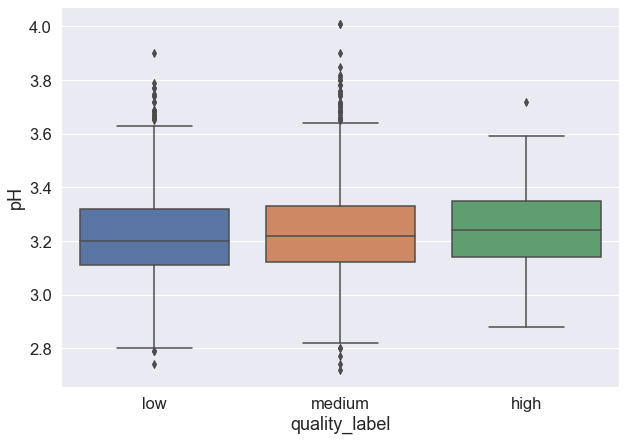

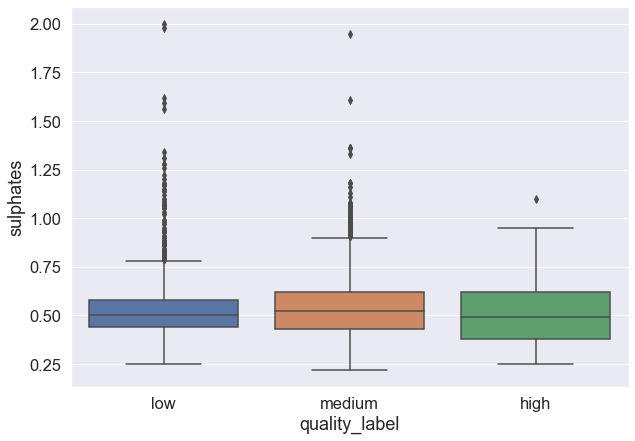

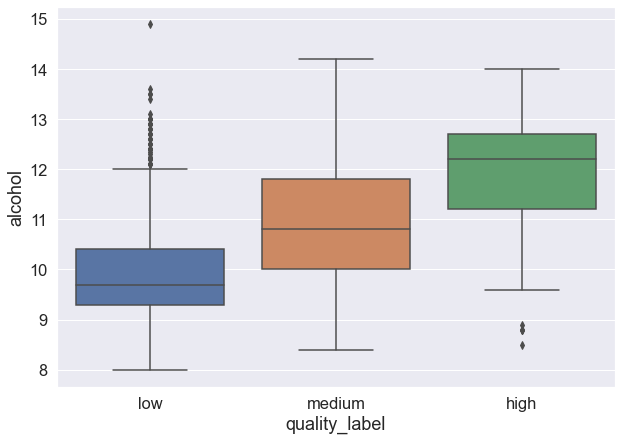

In [5]:
##### ------------------ HISTOGRAMS ---------------------- ##### 

features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

        
        fig = plt.figure()
        fig.set_size_inches(10,7)

        wines[feature].plot.hist(bins=15, color='blue', edgecolor='black', linewidth=1.0)
        plt.xlabel(feature)

        plt.show() 
        

#### ----------------- BOXPLOTS ----------------------- #####

features = wines.select_dtypes(include=['float64']).columns

for feature in features: 

        fig = plt.figure()

        # Seaborn Aesthetics Settings 
        sns.set_theme()
        sns.set_context()
        
        fig.set_size_inches(10,7)
        sns.set(font_scale = 1.5)
        sns.boxplot(x=wines['quality_label'],y=wines[feature])
        
        plt.show()   
        

#### Observations from Univariate Analysis: 

#### Wine Quality: 
#### Only alcohol shows a clear difference across wine quality. 


#### Outlier Removal 

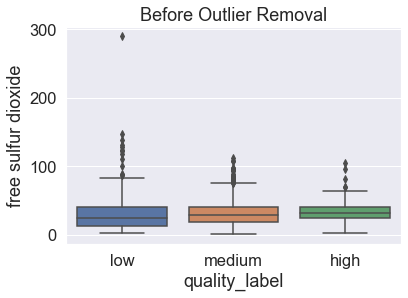

In [6]:
df = wines; feature = 'free sulfur dioxide'

df_no_outliers = df.copy(deep=True)

# Figure Settings 
sns.set_theme()
sns.set_context()
fig.set_size_inches(10,7)
sns.set(font_scale = 1.5)
# Plot Feature 
sns.boxplot(x=df_no_outliers['quality_label'],y=df_no_outliers[feature])
plt.title('Before Outlier Removal')
plt.show() 
        

In [7]:
# Outlier Removal from a single feature
q1=df_no_outliers[feature].quantile(0.25)
q3=df_no_outliers[feature].quantile(0.75)
iqr=(q3-q1)
lower=(q1-(1.5*iqr))
upper=(q3+(1.5*iqr))
median=df_no_outliers[feature].median()
for iter_range in range(df_no_outliers[feature].size):
    if df_no_outliers.iloc[iter_range]['quality_label']!="high":
        if( (df_no_outliers.iloc[iter_range][feature]<=lower) or \
            (df_no_outliers.iloc[iter_range][feature]>=upper)):
            df_no_outliers.iloc[iter_range,df_no_outliers.columns.get_loc(feature)] =median

In [8]:
# # Outlier Removal from whole dataframe
# Q1 = df_no_outliers.quantile(0.25)
# Q3 = df_no_outliers.quantile(0.75)
# IQR = Q3 - Q1
# print(IQR)

# df_no_outliers = df_no_outliers.select_dtypes(include='float64')
# print(df_no_outliers < (Q1 - 1.5 * IQR)) |(df_no_outliers > (Q3 + 1.5 * IQR))

# if df_no_outliers.loc['quality_label']!="high":
#     df_no_outliers = df_no_outliers[~((df_no_outliers < (Q1 - 1.5 * IQR)) |(df_no_outliers > (Q3 + 1.5 * IQR))).any(axis=1)]

# print(df_no_outliers.shape)


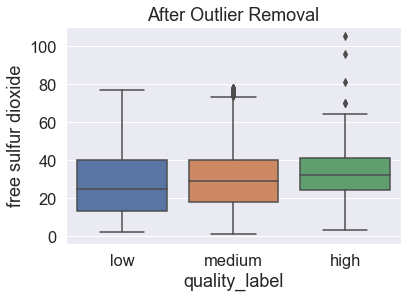

In [9]:
# Plot Feature 
sns.boxplot(x=df_no_outliers['quality_label'],y=df_no_outliers[feature])
plt.title('After Outlier Removal')
plt.show() 

### Multivariate Analysis 

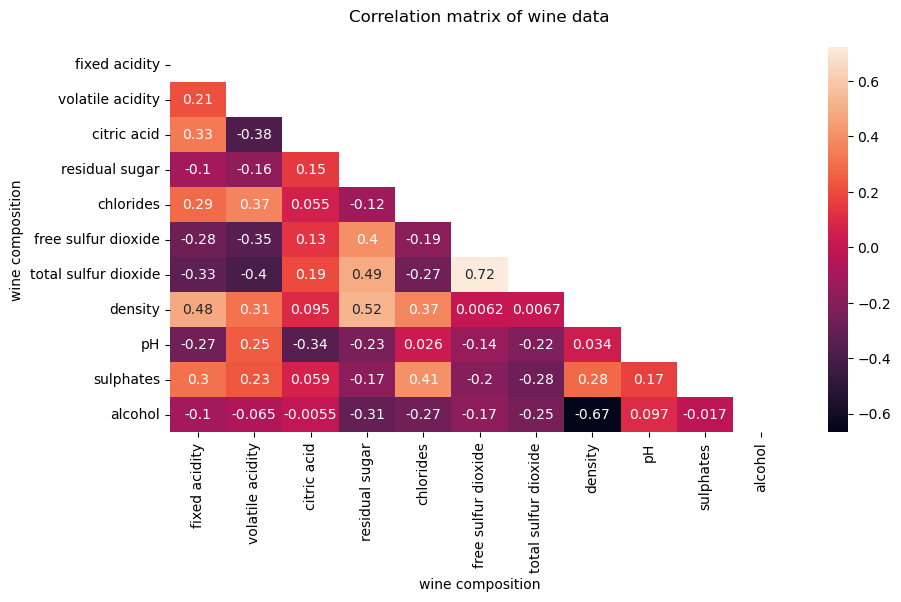

In [10]:
import matplotlib
matplotlib.style.use('default')

fig = plt.figure()
fig.set_size_inches(10,5)

wines_corrmat = wines.corr()
# Getting the Upper Triangle of the co-relation matrix
matrix = np.triu(wines_corrmat)
hm = sns.heatmap(wines_corrmat, annot = True, mask=matrix)
hm.set(xlabel='wine composition', ylabel='wine composition', title = "Correlation matrix of wine data\n")
plt.show()

# Wine Quality Classification using Machine Learning #

In [11]:
wines = df_no_outliers

wines.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_label,wine_type
0,5.3,0.32,0.12,6.6,0.043,22.0,141.0,0.99370,3.36,0.60,10.4,medium,white
1,6.4,0.30,0.27,4.4,0.055,17.0,135.0,0.99250,3.23,0.44,12.2,medium,white
2,6.5,0.22,0.32,2.2,0.028,36.0,92.0,0.99076,3.27,0.59,11.9,medium,white


In [12]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler # data normalisation with sklearn
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [13]:
# Features & Target
X = wines.select_dtypes(include=['float64'])
y = wines['quality_label'] # --> what you're trying to predict

In [14]:
X.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,5.3,0.32,0.12,6.6,0.043,22.0,141.0,0.99370,3.36,0.60,10.4
1,6.4,0.30,0.27,4.4,0.055,17.0,135.0,0.99250,3.23,0.44,12.2
2,6.5,0.22,0.32,2.2,0.028,36.0,92.0,0.99076,3.27,0.59,11.9


In [28]:
 # --- Encoding Categorical Variables ---#

encoder = LabelEncoder()
wines['quality_label'] = encoder.fit_transform(wines['quality_label'])
#wines['quality_label']

In [16]:
# --- Data Split --- #
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)
X_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
3892,9.6,0.77,0.12,2.9,0.082,30.0,74.0,0.99865,3.30,0.64,10.4
1702,6.4,0.16,0.22,1.4,0.040,41.0,149.0,0.99330,3.49,0.58,10.0
4974,7.2,0.56,0.26,2.0,0.083,13.0,100.0,0.99586,3.26,0.52,9.9


[Text(0.5, 1.0, 'Before Feature Scaling')]

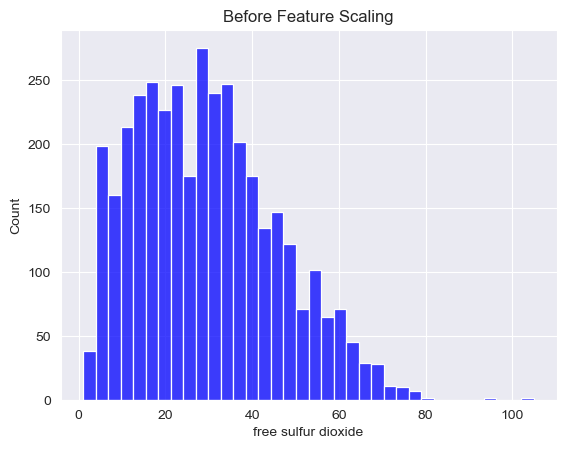

In [17]:
feature = 'free sulfur dioxide'

sns.set_style('darkgrid')
sns.histplot(X_train[feature], color = 'blue').set(title='Before Feature Scaling')


In [29]:
# --- Feature Scaling ---- # : Changing range of feature 
# fit scaler on training data
norm = MinMaxScaler().fit(X_train)

# transform training data
X_train_norm = norm.transform(X_train)

# transform testing data
X_test_norm = norm.transform(X_test)


df_cols = wines.columns
cols = df_cols[:11]
cols = np.array(cols[:])
cols = list(cols)

X_train = pd.DataFrame(X_train_norm, columns=cols)
X_test = pd.DataFrame(X_test_norm,columns=cols)

X_train.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.479339,0.552,0.12,0.071197,0.121262,0.278846,0.156682,0.497195,0.449612,0.222857,0.347826
1,0.214876,0.064,0.22,0.022654,0.051495,0.384615,0.329493,0.266293,0.596899,0.188571,0.289855
2,0.280992,0.384,0.26,0.042071,0.122924,0.115385,0.216590,0.376780,0.418605,0.154286,0.275362


In [19]:
# Changing shape 

# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# scaler.fit(X_train)
# X_train_norm = scaler.transform(X_train)
# X_test_norm = scaler.transform(X_test)

# X_train = pd.DataFrame(X_train_norm, columns=cols)
# X_test = pd.DataFrame(X_test_norm,columns=cols)

# X_train.head(3)

[Text(0.5, 1.0, 'After Feature Scaling')]

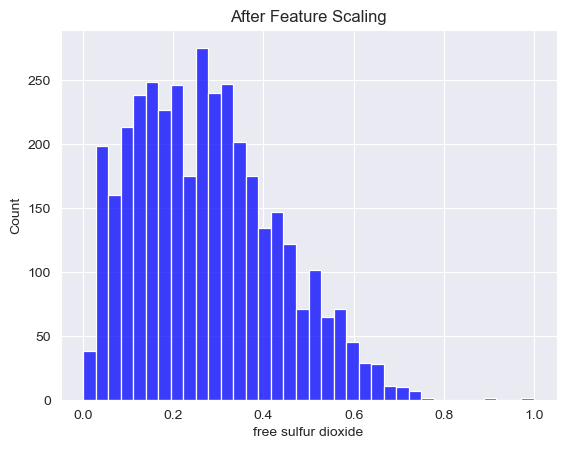

In [20]:
sns.histplot(X_train[feature], color = 'blue').set(title='After Feature Scaling')


#### Model Selection: Comparing different classification models

In [21]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

LR: 0.701641 (0.010534)
LDA: 0.698799 (0.011067)
KNN: 0.692370 (0.019380)
CART: 0.635806 (0.012808)
NB: 0.620204 (0.022748)
SVM: 0.719724 (0.008767)


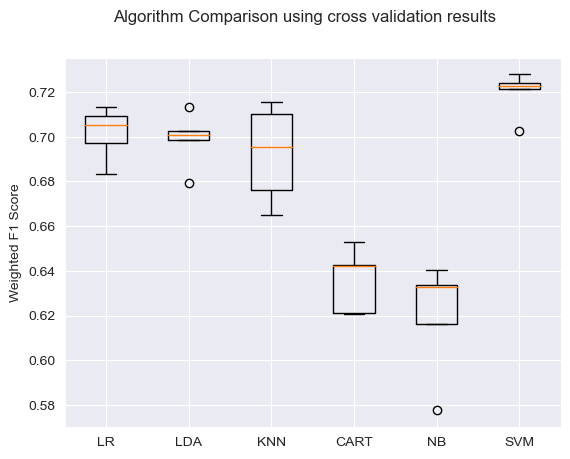

In [22]:
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'f1_weighted'

for name, model in models:

	kfold = model_selection.KFold(n_splits=5, random_state=seed, shuffle=True)
	cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)

	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison using cross validation results')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_ylabel('Weighted F1 Score')
ax.set_xticklabels(names)
plt.show()

In [23]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import classification_report

model = SVC() ### Best Model

model.fit(X_train, y_train)
  
y_pred = model.predict(X_test)

#### Evaluation metrics ####

# # Confusion Matrix
# cm = confusion_matrix(y_test, y_pred)

# disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
# disp.plot()
# plt.show()

# # Accuracy 
# print('Accuracy Score: ', accuracy_score(y_test,y_pred))

# # Balanced Accuracy
print('Balanced Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))

# Classification Report 
print(classification_report(y_test, y_pred))

# Kappa score 
kappa = cohen_kappa_score(y_test, y_pred)
print("Cohen-Kappa score:", kappa)

Balanced Accuracy Score:  0.4919464847076016
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        44
         low       0.69      0.65      0.67       585
      medium       0.76      0.83      0.79       967

    accuracy                           0.74      1596
   macro avg       0.49      0.49      0.49      1596
weighted avg       0.72      0.74      0.73      1596

Cohen-Kappa score: 0.4514333756449779


/Users/tanchaud/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanchaud/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/tanchaud/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [25]:

# check version number
import imblearn
print(imblearn.__version__)

0.8.0


#### SMOTE for imbalanced dataset

In [26]:
# Features & Target
X = wines.select_dtypes(include=['float64'])
y = wines['quality_label'] # --> what you're trying to predict

In [27]:
# --- Data Split --- #
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [31]:
...
# summarize class distribution
from collections import Counter
counter = Counter(y)
print(counter)

Counter({2: 3179, 1: 1988, 0: 153})


In [36]:
class where(y[0][0][0]):
    def out(self):
        print("it works")

# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
pyplot.legend()
pyplot.show()

IndexError: invalid index to scalar variable.